In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False
    

In [9]:
df=pd.read_csv('calls_data.csv')

In [10]:
mean_err=[]
win_length=3
batch_size=10
num_features=1
#training the model
model =tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(10, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(10, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(10,return_sequences=False))
model.add(tf.keras.layers.Dense(1))

-------------------------------------------user 153-------------------------------------------
-----------------------------training ............                  ---------------------------------
Epoch 1/50
12/12 [==============================] - 8s 160ms/step - loss: 0.1575 - mean_absolute_error: 0.3422 - val_loss: 0.7164 - val_mean_absolute_error: 0.8436
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.1267 - mean_absolute_error: 0.2956 - val_loss: 0.6312 - val_mean_absolute_error: 0.7915
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0989 - mean_absolute_error: 0.2541 - val_loss: 0.5435 - val_mean_absolute_error: 0.7341
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0737 - mean_absolute_error: 0.2198 - val_loss: 0.4535 - val_mean_absolute_error: 0.6701
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0533 - mean_absolute_error: 0.1877 - val_loss: 0.3653 - val_mean_absolute_e

Epoch 49/50
12/12 [==============================] - 0s 13ms/step - loss: 3.2640e-04 - mean_absolute_error: 0.0151 - val_loss: 2.0338e-04 - val_mean_absolute_error: 0.0107
Epoch 50/50
12/12 [==============================] - 0s 10ms/step - loss: 3.1306e-04 - mean_absolute_error: 0.0147 - val_loss: 2.1197e-04 - val_mean_absolute_error: 0.0108
-----------------------------------model evaluator----------------------------------
---------------------------------mean_squared_error----------------------------------
0.014301231161293754


<ipython-input-11-764fd9250327>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,
<ipython-input-11-764fd9250327>:24: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)
<ipython-input-11-764fd9250327>:25: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


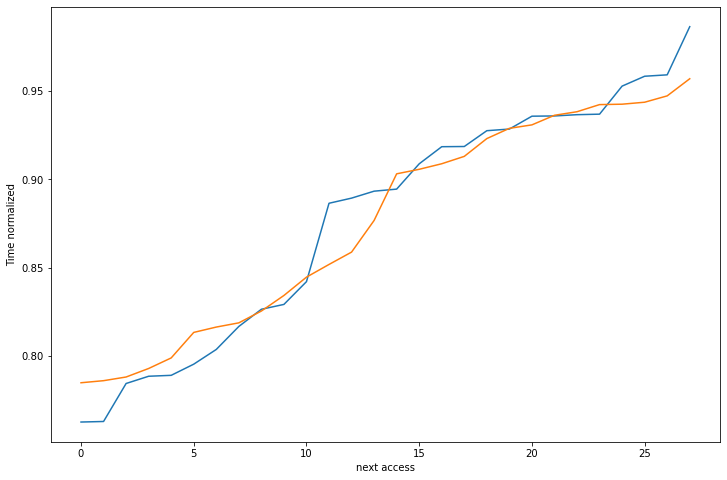

-------------------------------------------user 154-------------------------------------------
-----------------------------training ............                  ---------------------------------
Epoch 1/50
12/12 [==============================] - 8s 147ms/step - loss: 8.4736e-04 - mean_absolute_error: 0.0262 - val_loss: 2.0617e-04 - val_mean_absolute_error: 0.0113
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0010 - mean_absolute_error: 0.0278 - val_loss: 3.3112e-04 - val_mean_absolute_error: 0.0141
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 5.5887e-04 - mean_absolute_error: 0.0207 - val_loss: 3.5421e-04 - val_mean_absolute_error: 0.0148
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 8.3377e-04 - mean_absolute_error: 0.0263 - val_loss: 5.8434e-04 - val_mean_absolute_error: 0.0201
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 5.0313e-04 - mean_absolute_error: 0.0194 - val_los

<ipython-input-11-764fd9250327>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,
<ipython-input-11-764fd9250327>:24: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)
<ipython-input-11-764fd9250327>:25: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


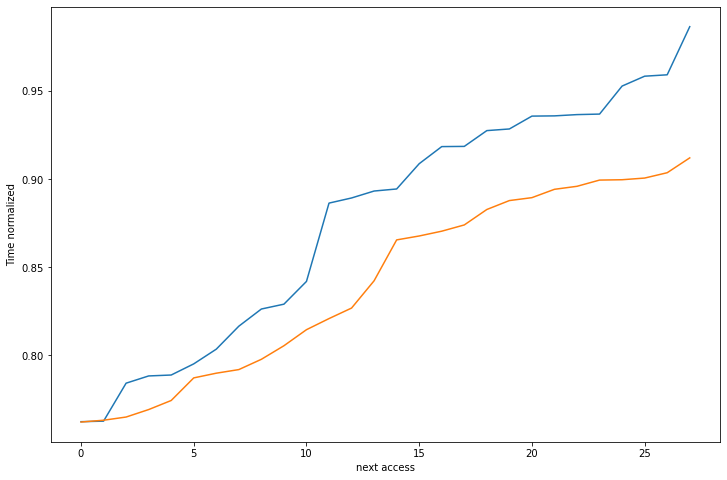

In [ ]:

for i in range(1,350):
    array=df.loc[df['user'] == 1]
    array=array.drop(['duration','user'],axis=1)
    array.rename(columns = {'time_normalized':1}, inplace = True)
    array=array.values.tolist()
    df_id=pd.DataFrame(array)
    print("-------------------------------------------user "+str(i)+"-------------------------------------------")
    scaler=MinMaxScaler(feature_range=(0,1))
    data_scaled=scaler.fit_transform(np.array(df_id).reshape(-1,1))
    #storing the data_scaled as features and target is how the data should be printed
    features =data_scaled
    target=data_scaled[:,]
    x_train,x_test,y_train,y_test=train_test_split(features, target,test_size=0.20,shuffle=False)
    train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,batch_size=10)
    test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,batch_size=10)
    print("-----------------------------training ............                  ---------------------------------")
    model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])
    history=model.fit_generator(train_generator,epochs=50,
                           validation_data=test_generator,
                           shuffle=False)
    print("-----------------------------------model evaluator----------------------------------")
    model.evaluate_generator(test_generator,verbose=0)
    predictions = model.predict_generator(test_generator)
    x_test=x_test[:,:][win_length:]
    rev_trans=scaler.inverse_transform(predictions)
    rev_true=scaler.inverse_transform(x_test)
    df_pred=pd.DataFrame(rev_trans)
    df_true=pd.DataFrame(rev_true)
    df_true.rename(columns = {0:'True_data'}, inplace = True)
    df_pred.rename(columns = {0:'Pred_data'}, inplace = True)
    print("---------------------------------mean_squared_error----------------------------------")
    print(math.sqrt(mean_squared_error(df_true,df_pred)))
    mean_err.append(math.sqrt(mean_squared_error(df_true,df_pred)))
    r = pd.concat([df_pred,df_true], axis=1)
    r['True_data'].plot(figsize=(12,8))
    r['Pred_data'].plot(figsize=(12,8))
    plt.xlabel('next access')
    plt.ylabel('Time normalized')
    plt.show()
    r.to_csv('user_'+str(i)+'.csv',
               index = None)